In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.compose import make_column_transformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings('ignore')

In [5]:
url = 'C:/Users/felip/Desktop/Projetos/Fraud Analytics/creditcard.csv'
df_fraud = pd.read_csv(url)
df_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
print('Checking if there are null values in the dataset')
df_fraud.isna().sum()

Checking if there are null values in the dataset


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print('% of fraud in dataset in relation to non-fraud')
count_fraud = df_fraud['Class'].value_counts(normalize=True)
print(f'Non-Fraud: {round(count_fraud[0]*100,2)}% | Fraud: {round(count_fraud[1]*100,3)}%')

% of fraud in dataset in relation to non-fraud
Non-Fraud: 99.83% | Fraud: 0.173%


In [8]:
df_fraud.drop(['Time','Amount'], axis=1).columns.to_list()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class']

In [9]:
def configs_to_plot(title='', x_axis='', y_axis=''):
    sns.set_style('darkgrid')
    figure(figsize=(8, 5), dpi=100)
    plt.title(f'{title}',fontsize=14)
    plt.xlabel(f'{x_axis}',fontsize=14)
    plt.ylabel(f'{y_axis}',fontsize=14)
    plt.xticks(fontsize=14, rotation = 75)
    plt.yticks(fontsize=14)

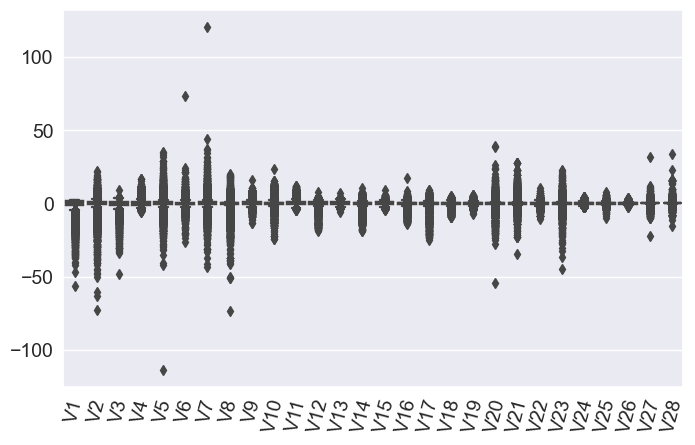

In [10]:
configs_to_plot()
sns.boxplot(data=df_fraud.drop(['Time','Amount','Class'], axis=1));

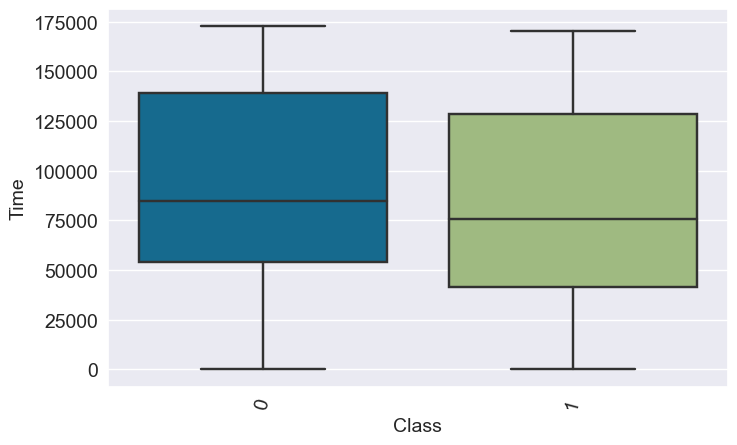

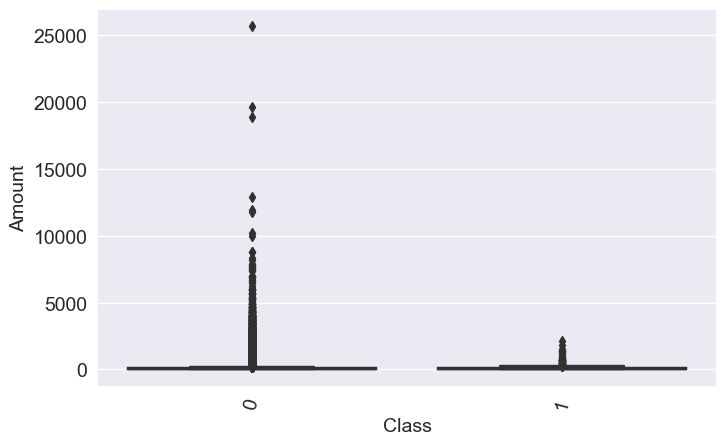

In [11]:
configs_to_plot()
sns.boxplot(x='Class', y='Time', data=df_fraud)
plt.show()
configs_to_plot()
sns.boxplot(x='Class', y='Amount', data=df_fraud);
plt.show()

In [12]:
fraud = df_fraud[df_fraud['Class']==1]
non_fraud = df_fraud[df_fraud['Class']!=1].sample(len(fraud), random_state=13)

df = pd.concat([fraud,non_fraud])

In [13]:
y = df['Class']
x = df.drop('Class',axis=1)

print('Total data:',len(x),'samples')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=123)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.10, random_state=123)

print('Data for train:',len(x_train),'samples')
print('Data for test:',len(x_test),'samples')
print('Data for validation:',len(x_val),'samples')

Total data: 984 samples
Data for train: 688 samples
Data for test: 266 samples
Data for validation: 30 samples


In [14]:
estimator = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=2500, random_state=1234)
estimator.fit(x_train,y_train)
estimator.score(x_test,y_test)

0.9323308270676691

<p>We get <b>93% score</b>, for some types of predictions it sounds interesting, but in this case related to fraud, the score metric may not be interesting.</p>

<p>The score metric calculates the percentage of accuracy of the model indiscriminately, regardless of the classes, but in our model we want to focus mainly on predictions of fraudulent operations.</p>

<p>Let's imagine that out of 100% of our operations we have 7% error and all these 7% error refer to fraudulent operations, where we classify fraudulent operations as non-fraudulent, this would not be the ideal result, as it would cause financial problems for the company, on the contrary if the 7% referred to 7% of non-fraud classified as a fraud, we would not have any financial loss, we would only waste some time calling customers, confirming their purchase.</p>

<p>For this kind of view we need a metric that shows us exactly how many errors are in each class.</p>

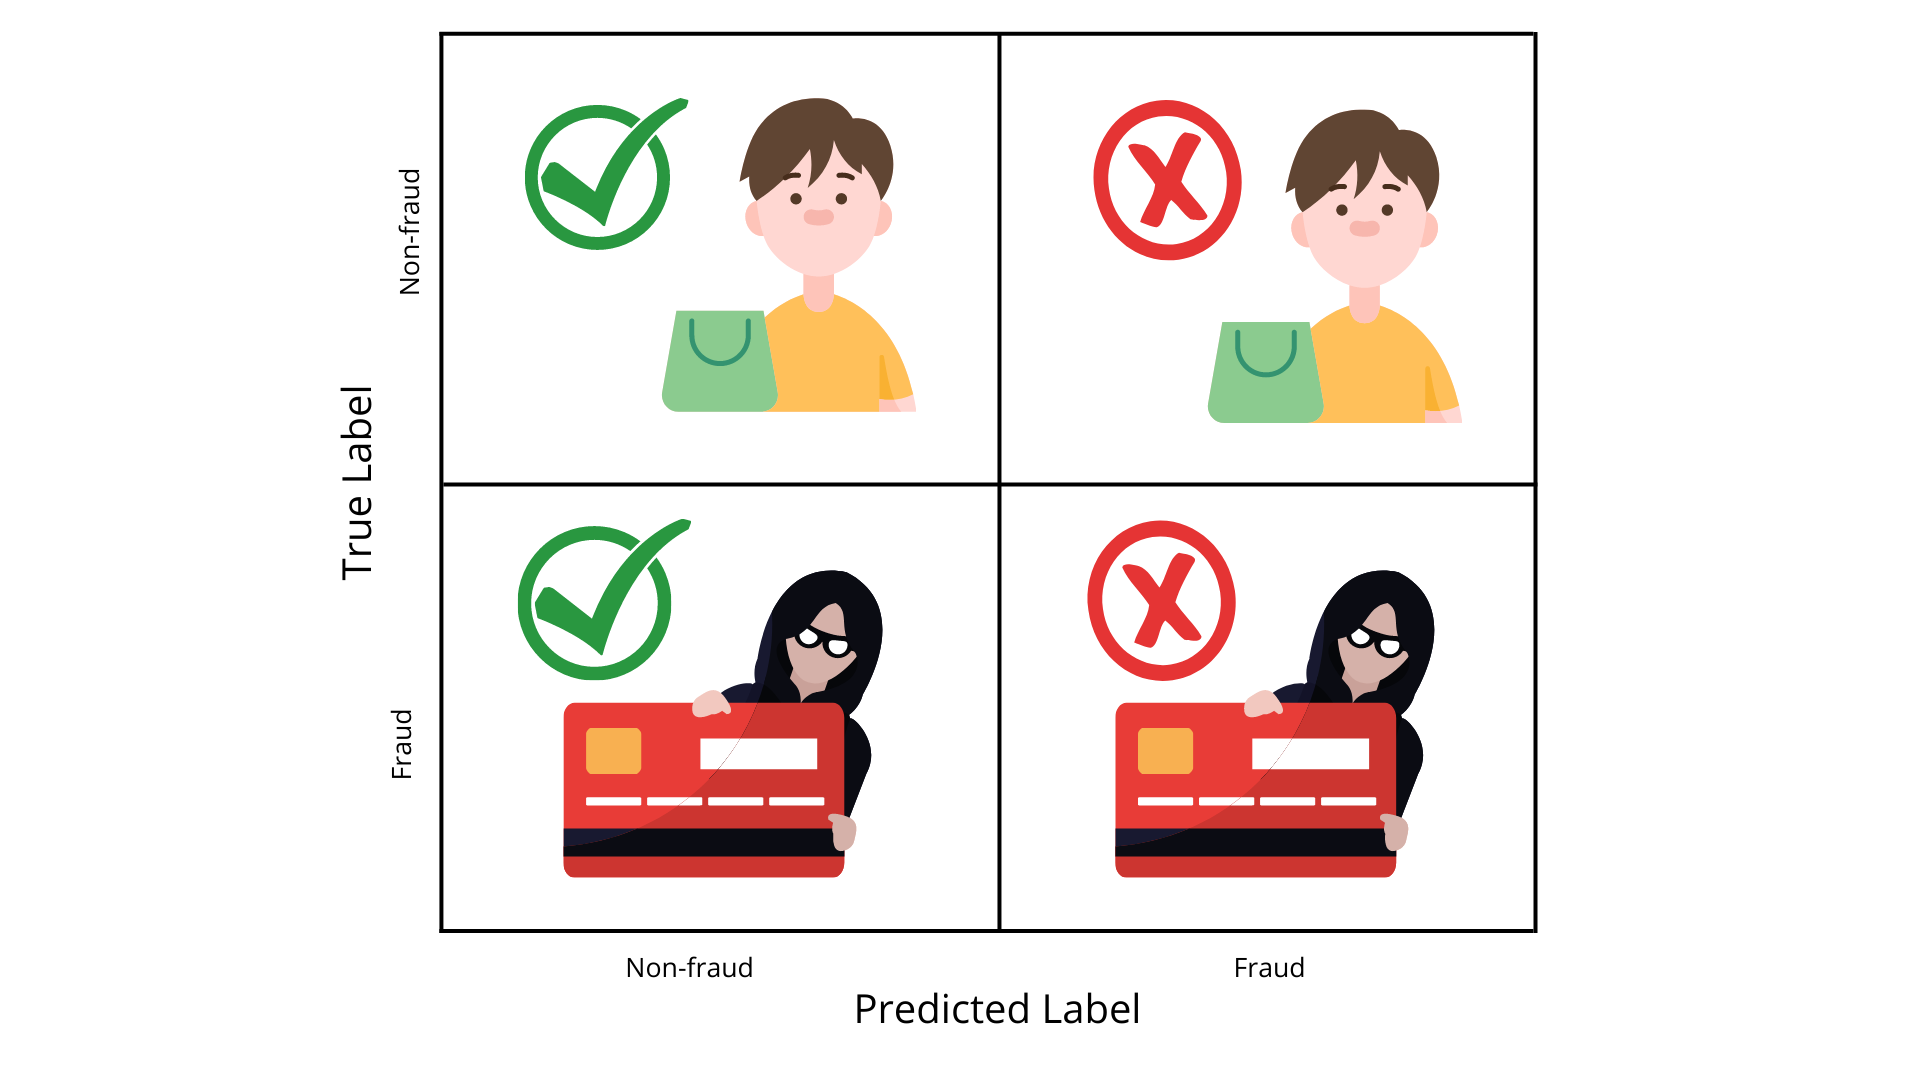

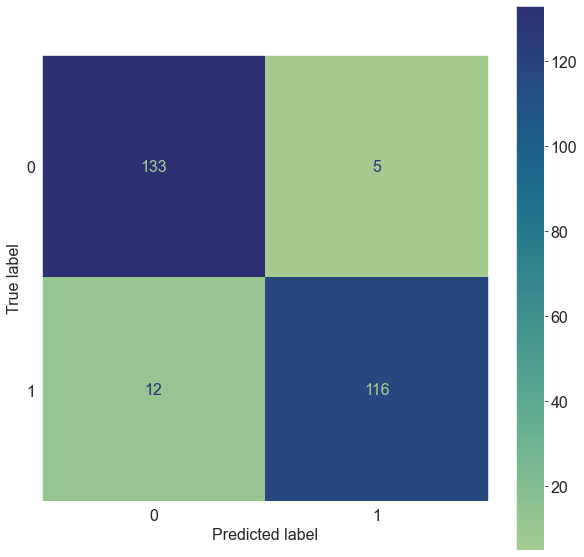

In [82]:
c_matrix = confusion_matrix(y_test,estimator.predict(x_test),labels=estimator.classes_)
c_matrix_plot = ConfusionMatrixDisplay(c_m, display_labels=estimator.classes_)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
c_matrix_plot.plot(cmap='crest', ax=ax )
plt.grid(False)

<p><center>Here we can see in the confusion matrix how many frauds are happening, due to prediction failures in our model.</center></p>

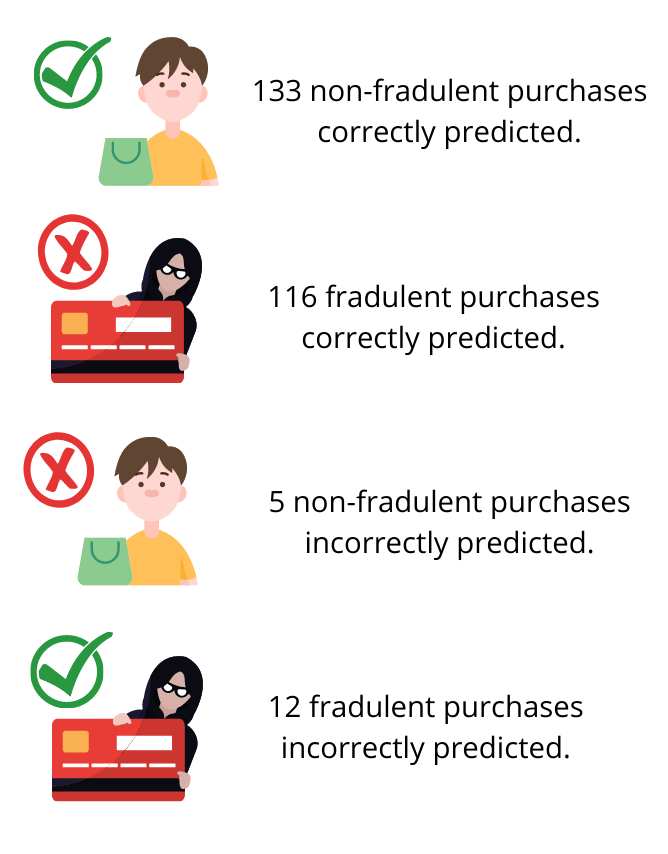

In [16]:
from pycaret.classification import *
s = setup(df,target='Class')
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9535,0.9819,0.9273,0.9758,0.9501,0.9067,0.9090,0.2610
xgboost,Extreme Gradient Boosting,0.9477,0.9837,0.9212,0.9691,0.9437,0.8950,0.8974,0.0900
lr,Logistic Regression,0.9390,0.9665,0.8970,0.9747,0.9331,0.8773,0.8815,0.4860
gbc,Gradient Boosting Classifier,0.9375,0.9817,0.9061,0.9635,0.9327,0.8744,0.8776,0.1210
ada,Ada Boost Classifier,0.9346,0.9697,0.9152,0.9490,0.9306,0.8689,0.8713,0.0650
et,Extra Trees Classifier,0.9346,0.9836,0.8848,0.9773,0.9277,0.8684,0.8733,0.0790
rf,Random Forest Classifier,0.9317,0.9830,0.8970,0.9591,0.9258,0.8627,0.8660,0.0900
qda,Quadratic Discriminant Analysis,0.9288,0.9654,0.9121,0.9390,0.9243,0.8572,0.8592,0.0070
dt,Decision Tree Classifier,0.9201,0.9198,0.9152,0.9217,0.9168,0.8399,0.8427,0.0050
ridge,Ridge Classifier,0.9128,0.0000,0.8333,0.9829,0.9009,0.8241,0.8342,0.0040


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [44]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.216500,-0.197425,0.134010,-0.196235,0.274612,0.093876,0.214656,-0.139424,0.158544,...,-0.052497,0.106292,0.032636,-0.019767,-0.169908,-0.065100,-0.129767,0.016947,0.002771,-0.129848
V1,0.216500,1.000000,-0.674030,0.875347,-0.622038,0.855225,0.297623,0.858985,-0.071713,0.634619,...,0.010970,-0.009257,0.074653,-0.067233,-0.030863,0.083379,0.175010,0.204078,-0.057488,-0.418360
V2,-0.197425,-0.674030,1.000000,-0.781178,0.603065,-0.730675,-0.297702,-0.812174,-0.006879,-0.683833,...,0.032482,0.055852,0.301521,-0.055769,0.197401,0.023621,-0.170087,0.010379,-0.281195,0.464240
V3,0.134010,0.875347,-0.781178,1.000000,-0.775253,0.852092,0.458629,0.881400,-0.167805,0.763554,...,0.025098,-0.052489,-0.001235,0.035260,-0.095710,0.003941,0.096277,0.139536,-0.018506,-0.567284
V4,-0.196235,-0.622038,0.603065,-0.775253,1.000000,-0.581661,-0.427908,-0.701478,0.096261,-0.797269,...,-0.018474,0.105259,-0.025068,-0.106088,-0.009249,0.127478,-0.006134,-0.091929,0.025183,0.699925
V5,0.274612,0.855225,-0.730675,0.852092,-0.581661,1.000000,0.287439,0.834605,-0.206199,0.660392,...,0.040027,-0.100987,-0.095882,-0.124484,-0.104280,0.058317,0.193551,0.182363,-0.102941,-0.371639
V6,0.093876,0.297623,-0.297702,0.458629,-0.427908,0.287439,1.000000,0.293579,-0.566371,0.379295,...,0.020793,-0.010613,0.294246,-0.011800,-0.154926,-0.065682,-0.191795,-0.042225,0.194934,-0.406901
V7,0.214656,0.858985,-0.812174,0.881400,-0.701478,0.834605,0.293579,1.000000,0.088736,0.760986,...,0.043322,-0.129397,-0.072862,-0.031111,0.034866,0.021881,0.231116,0.161408,0.122278,-0.475926
V8,-0.139424,-0.071713,-0.006879,-0.167805,0.096261,-0.206199,-0.566371,0.088736,1.000000,-0.072759,...,-0.100305,0.032077,-0.315412,0.073977,0.239271,0.049135,0.283610,-0.014721,0.018777,0.062343
V9,0.158544,0.634619,-0.683833,0.763554,-0.797269,0.660392,0.379295,0.760986,-0.072759,1.000000,...,0.155908,-0.247854,-0.095417,0.032457,-0.047703,-0.106759,0.132897,0.135359,0.012747,-0.566370


In [45]:
class_correlation = df.corr().loc[['Class']].T.sort_values(by='Class')
print(class_correlation[(class_correlation['Class']>0.5) | (class_correlation['Class']<-0.5)])

          Class
V14   -0.748680
V12   -0.681143
V10   -0.620246
V16   -0.597711
V3    -0.567284
V9    -0.566370
V17   -0.561737
V11    0.685536
V4     0.699925
Class  1.000000


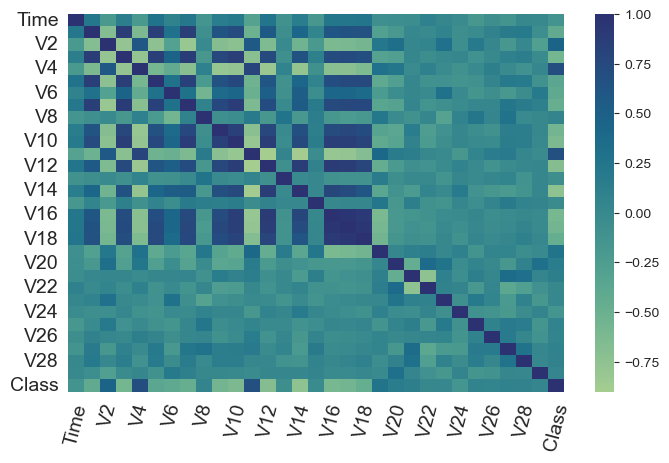

In [49]:
configs_to_plot()
sns.heatmap(df.corr(),cmap='crest');

In [210]:
columns_to_scale = x[['Time','Amount']].columns.tolist()
std_s = StandardScaler()
mm_s = MinMaxScaler()
rb_s = RobustScaler()

preprocess = make_column_transformer(
    (rb_s,columns_to_scale )
)

estimator = XGBClassifier()

feature_selection = SelectFromModel(estimator)

steps = [
    ('f_s', feature_selection),
    ('clf', estimator)
]

pip = Pipeline(steps)

param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3,10,1),
    'clf__n_estimators': np.arange(50,250,50)
}

rand_auc = RandomizedSearchCV(estimator=pip, param_distributions=param_grid, n_iter=5, scoring='roc_auc', cv=5, verbose=False)

rand_auc.fit(x_train, y_train)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    steps = [
        ('preprocess', preprocess),
        ('select', fs),
        ('clf', classifier)
    ]
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipeline.score(X_test, y_test))

[21:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('f_s',
                                              SelectFromModel(estimator=XGBClassifier(base_score=None,
                                                                                      booster=None,
                                                                                      colsample_bylevel=None,
                                                                                      colsample_bynode=None,
                                                                                      colsample_bytree=None,
                                                                                      enable_categorical=False,
                                                                                      gamma=None,
                                                                                      gpu_id=None,
                                                                                  

In [213]:
rand_auc.best_score_

0.9686490727355844

In [207]:
pip.fit(x_train,y_train)

[20:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('f_s',
                 SelectFromModel(estimator=XGBClassifier(base_score=0.5,
                                                         booster='gbtree',
                                                         colsample_bylevel=1,
                                                         colsample_bynode=1,
                                                         colsample_bytree=1,
                                                         enable_categorical=False,
                                                         gamma=0, gpu_id=-1,
                                                         importance_type=None,
                                                         interaction_constraints='',
                                                         learning_rate=0.300000012,
                                                         max_delta_step=0,
                                                         max_depth=6,
                                           

In [208]:
pip.score(x_test,y_test)

0.943609022556391

In [ ]:
cm = confusion_matrix(modelo.predict(x_test),y_test)
plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3])
print(classification_report(modelo.predict(x_test),y_test))